#### SP Cashflow Modeling Presentation
---
#### Contents
- basic installment collateral cashflow forecast
- pass through
- warehouse structuring, scenario analysis, comprehensive analytics visuals
- securitization financing structuring, scenario analysis, comprehensive analytics visuals


In [1]:
from AssetModeling.Asset import Asset
from AssetModeling.Storage import AssetStore
from StructureModeling.Storage import StructureStore
from DealManager.DealManager import DealManager
from DealManager.DealAnalytics import DealAnalytics
from Utils.SPCFUtils import SPCFUtils
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
tabulatePrint = lambda x: print(tabulate(x, headers='keys', tablefmt='psql'))

#### Single collateral modeling. show curves, metrics, yield table

In [2]:

asset1 = Asset(**AssetStore.ASSETSTORE['consumerLoanUpstart2302'])

In [3]:
tabulatePrint(asset1.getStaticMetrics()) # show static metric
tabulatePrint(asset1.calculateYieldTable(pxList = range(90,100))) # show yield talbe

+----+---------------+--------------------+
|    | matrics       | value              |
|----+---------------+--------------------|
|  0 | notional      | 1000000000.0       |
|  1 | wal           | 2.2829543837303623 |
|  2 | intRate       | 0.2175             |
|  3 | term          | 56                 |
|  4 | intPmt        | 431514196.9953185  |
|  5 | prinPmt       | 812935240.8000017  |
|  6 | totalPmt      | 1233929487.9289541 |
|  7 | totalDefault  | 203331260.0        |
|  8 | totalLoss     | 187064759.20000002 |
|  9 | cnl           | 0.1870647592       |
| 10 | cgl           | 0.20333126         |
| 11 | lossTiming    | 40/32/19/9/1       |
| 12 | defaultTiming | 40/32/19/9/1       |
+----+---------------+--------------------+
+----+------+----------+
|    |   px |    yield |
|----+------+----------|
|  0 |   90 | 0.169505 |
|  1 |   91 | 0.16307  |
|  2 |   92 | 0.156745 |
|  3 |   93 | 0.150527 |
|  4 |   94 | 0.144413 |
|  5 |   95 | 0.138399 |
|  6 |   96 | 0.132484 |
| 

#### ramp up portfolio and showing balance sheet build up and analytics

In [4]:
dealRampPortfolio = DealManager(dealName = "plainCollateralDeal",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"
                                       },
                    rampSchedule = {"ramp": "20 for 12", "px":"100 for 6 98"},
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    )

analytics = DealAnalytics(dealRampPortfolio)

+----+----------------------+--------------+
|    | matrics/px           |         base |
|----+----------------------+--------------|
|  0 | purchasePeriod       | 12           |
|  1 | totalPurchaseBalance |  2.4e+08     |
|  2 | totalPurchaseBasis   |  2.376e+08   |
|  3 | avgPurchasePx        | 99           |
|  4 | peakBalance          |  2.12273e+08 |
|  5 | peakBalancePeriod    | 11           |
|  6 | wal                  |  2.74129     |
|  7 | breakevenPeriod      | 46           |
|  8 | totalPnL             |  5.85431e+07 |
|  9 | yield                |  0.115135    |
| 10 | moic                 |  1.24639     |
+----+----------------------+--------------+


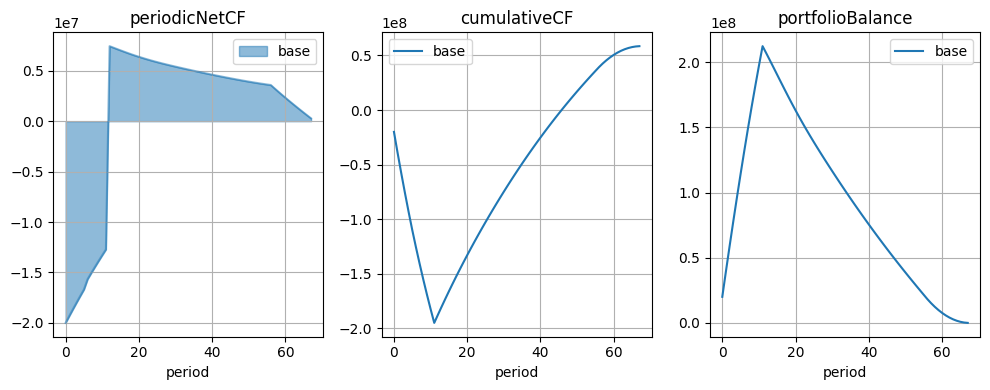

In [5]:
# show static metrices
print(tabulate(analytics.getAssetStaticMetrics(ramp=True), headers='keys', tablefmt='psql'))

# show curves
analytics.plotRampCurves()



#### Collateral scenarios. Static metrices and curves.

In [8]:
deal1 = DealManager(dealName = "plainCollateralDeal",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    )
deal1.copyAssetWithNewAssumption("base", "frontLoad_25CGL", {"totalDefault": 0.25})
deal1.copyAssetWithNewAssumption("base", "frontLoad_27CGL", {"totalDefault": 0.27})




*********************************
******     Capital Stack
*********************************
  class  size  coupon  advRate
0     A   0.0     0.0        0


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base    frontLoad_25CGL    frontLoad_27CGL
matrics/px                                                            
notional            1000000000.0       1000000000.0       1000000000.0
wal                     2.282954           2.226613           2.200252
intRate                   0.2175             0.2175             0.2175
term                          56                 56                 56
intPmt          431514196.995318   415819080.527914   409024657.814753
prinPmt         812935240.800002   770529000.000001   752171320.000001
totalPmt       1233929487.928954  1176200816.384115  1151210049.481587
totalDefault         2033

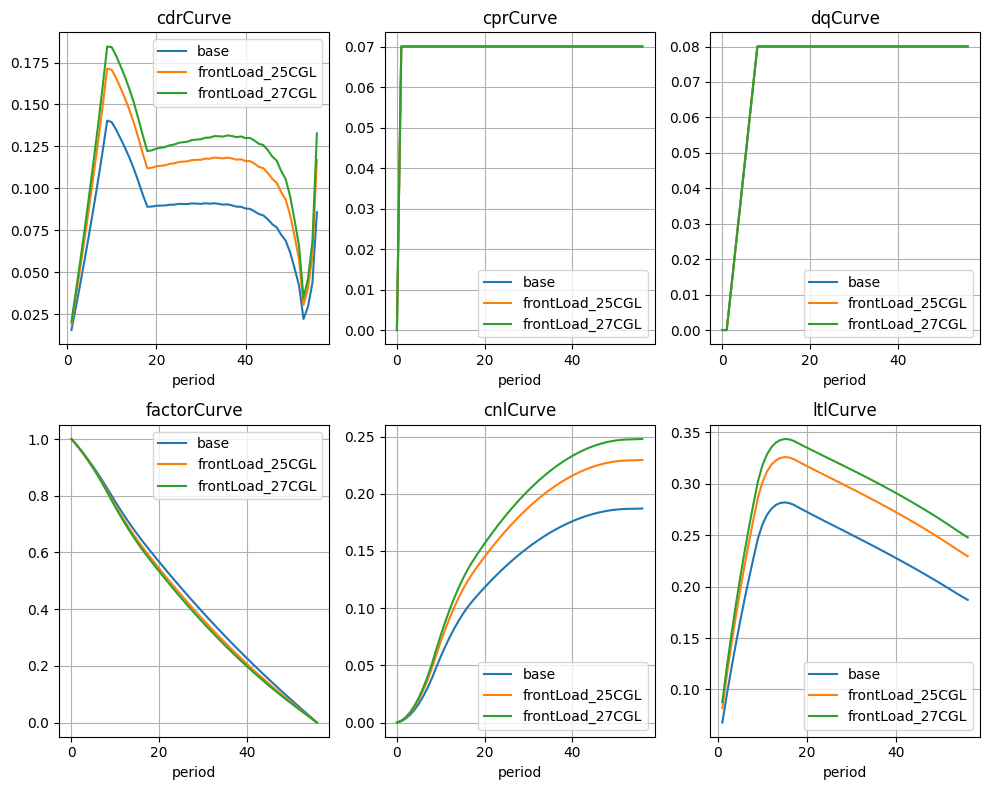

In [9]:
analytics = DealAnalytics(deal1)
analytics.presentDeal()
analytics.plotCollateralCurves()

#### Pass-through (0 adv rate ABS structure). Bake in deal fees, and show economics under different assumption

In [11]:
deal2 = DealManager(dealName = "PTDeal",
                    dealDescriptive = {"dealSubsector":"subprime auto",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    financingTerms = StructureStore.STRUCTURESTORE['PT']
                    )
deal2Analytics = DealAnalytics(deal2)
deal2Analytics.presentDeal()



*********************************
******     Capital Stack
*********************************
  class  size  coupon  advRate
0     A   0.0     0.0        0


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base
matrics/px                      
notional            1000000000.0
wal                     2.282954
intRate                   0.2175
term                          56
intPmt          431514196.995318
prinPmt         812935240.800002
totalPmt       1233929487.928954
totalDefault         203331260.0
totalLoss            187064759.2
cnl                     0.187065
cgl                     0.203331
lossTiming          40/32/19/9/1
defaultTiming       40/32/19/9/1
100                     0.109743
95                      0.138399
90                      0.169505


************************************************
******     Ramped A

#### A/B cut. (70/30 ABS Structure). single tranche term ABS.



*********************************
******     Capital Stack
*********************************
  class        size  coupon  advRate
0     A  70000000.0    0.07       70


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base            baseAlt          base_1.0x  \
matrics/px                                                               
notional            1000000000.0       1000000000.0       1000000000.0   
wal                     2.282954           2.185468           2.282954   
intRate                   0.2175             0.2175             0.2175   
term                          56                 56                 56   
intPmt          431514196.995318   415090445.322393   431514196.995318   
prinPmt         812935240.800002   756700002.772867   812935240.800002   
totalPmt       1233929487.928954  1161655778.254008  1233929

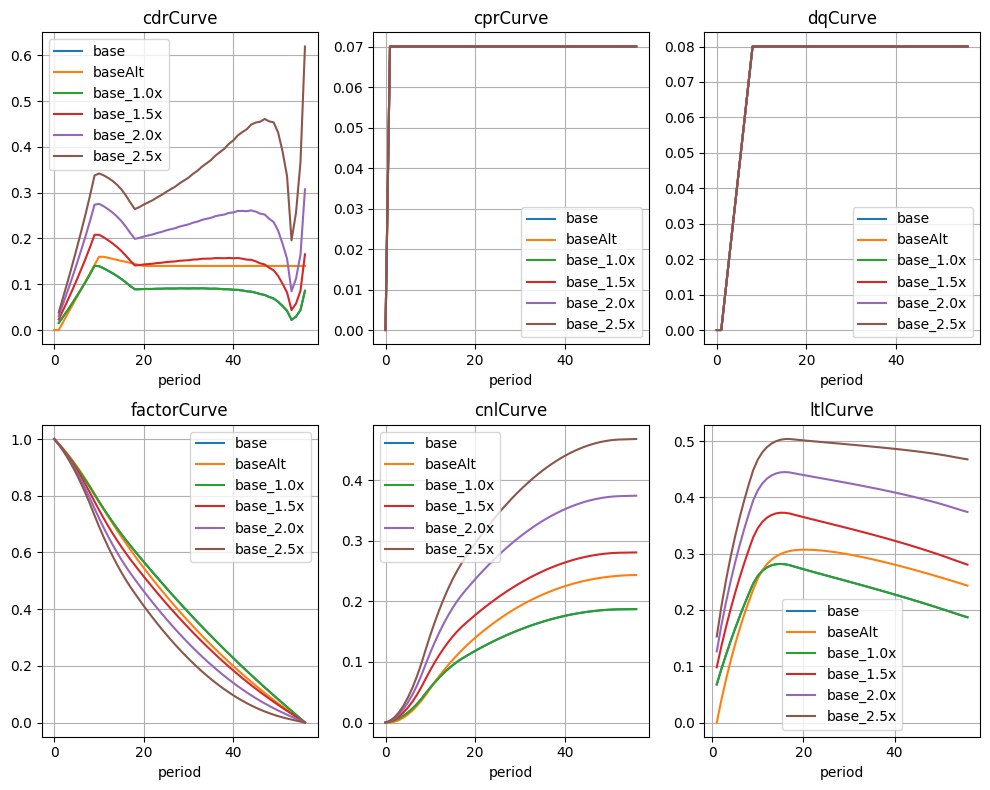

In [13]:
dealABCut = DealManager(dealName = "ABCutonConsumerLoan",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    financingTerms = StructureStore.STRUCTURESTORE['ABCut']
                    )
dealABCut.copyAssetWithNewAssumption("base", "baseAlt", {"defaultTimingCurve": None,
                                                                   "totalDefault": None,
                                                                   "cdrVector": SPCFUtils.convertIntexRamp("0 ramp 10 16 16 ramp 10 14", term = 56, divisor = 100)
                                                                   }
                                     )

dealABCut.addSeriesDefaultScenario(startingMultiple=1.0, endingMultiple=2.5, step=0.5)
analytics = DealAnalytics(dealABCut)
analytics.presentDeal()
analytics.plotCollateralCurves()

#### securitization financing structuring, scenario analysis, comprehensive analytics visuals

In [14]:
dealConsumerLoanABS = DealManager(dealName = "UPST2302",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"Upstart"                                       
                        },
                    rampSchedule = {"ramp": "204", "px":100},
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    financingTerms = StructureStore.STRUCTURESTORE['ConsumerABS']
                    )
dealConsumerLoanABS.copyAssetWithNewAssumption("base", "baseAlt", {"defaultTimingCurve": None,
                                                                   "totalDefault": None,
                                                                   "cdrVector": SPCFUtils.convertIntexRamp("0 ramp 10 20 20 ramp 6 15", term = 56, divisor = 100)
                                                                   }
                                                                   )

dealConsumerLoanABS.addSeriesDefaultScenario(startingMultiple=1.5, endingMultiple=2.0, step=0.5, baseScenario="base")
analytics = DealAnalytics(dealConsumerLoanABS)
analytics.presentDeal()





*********************************
******     Capital Stack
*********************************
  class         size  coupon  advRate
0     A  108732000.0  0.0677    53.30
1     B   27438000.0  0.0792    66.75
2     C   37230000.0  0.1187    85.00


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base            baseAlt          base_1.5x  \
matrics/px                                                               
notional            1000000000.0       1000000000.0       1000000000.0   
wal                     2.282954           2.155849           2.149855   
intRate                   0.2175             0.2175             0.2175   
term                          56                 56                 56   
intPmt          431514196.995318   404218722.789832   396896613.271758   
prinPmt         812935240.800002   731847382.051918   71

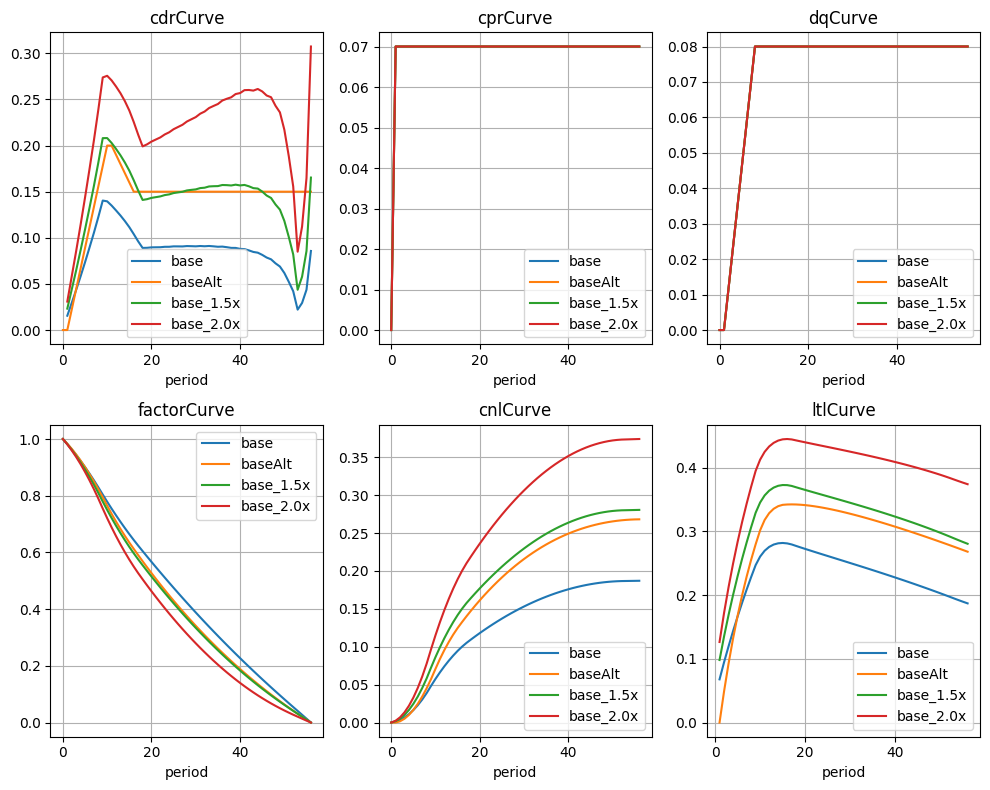

In [15]:

analytics.plotCollateralCurves()

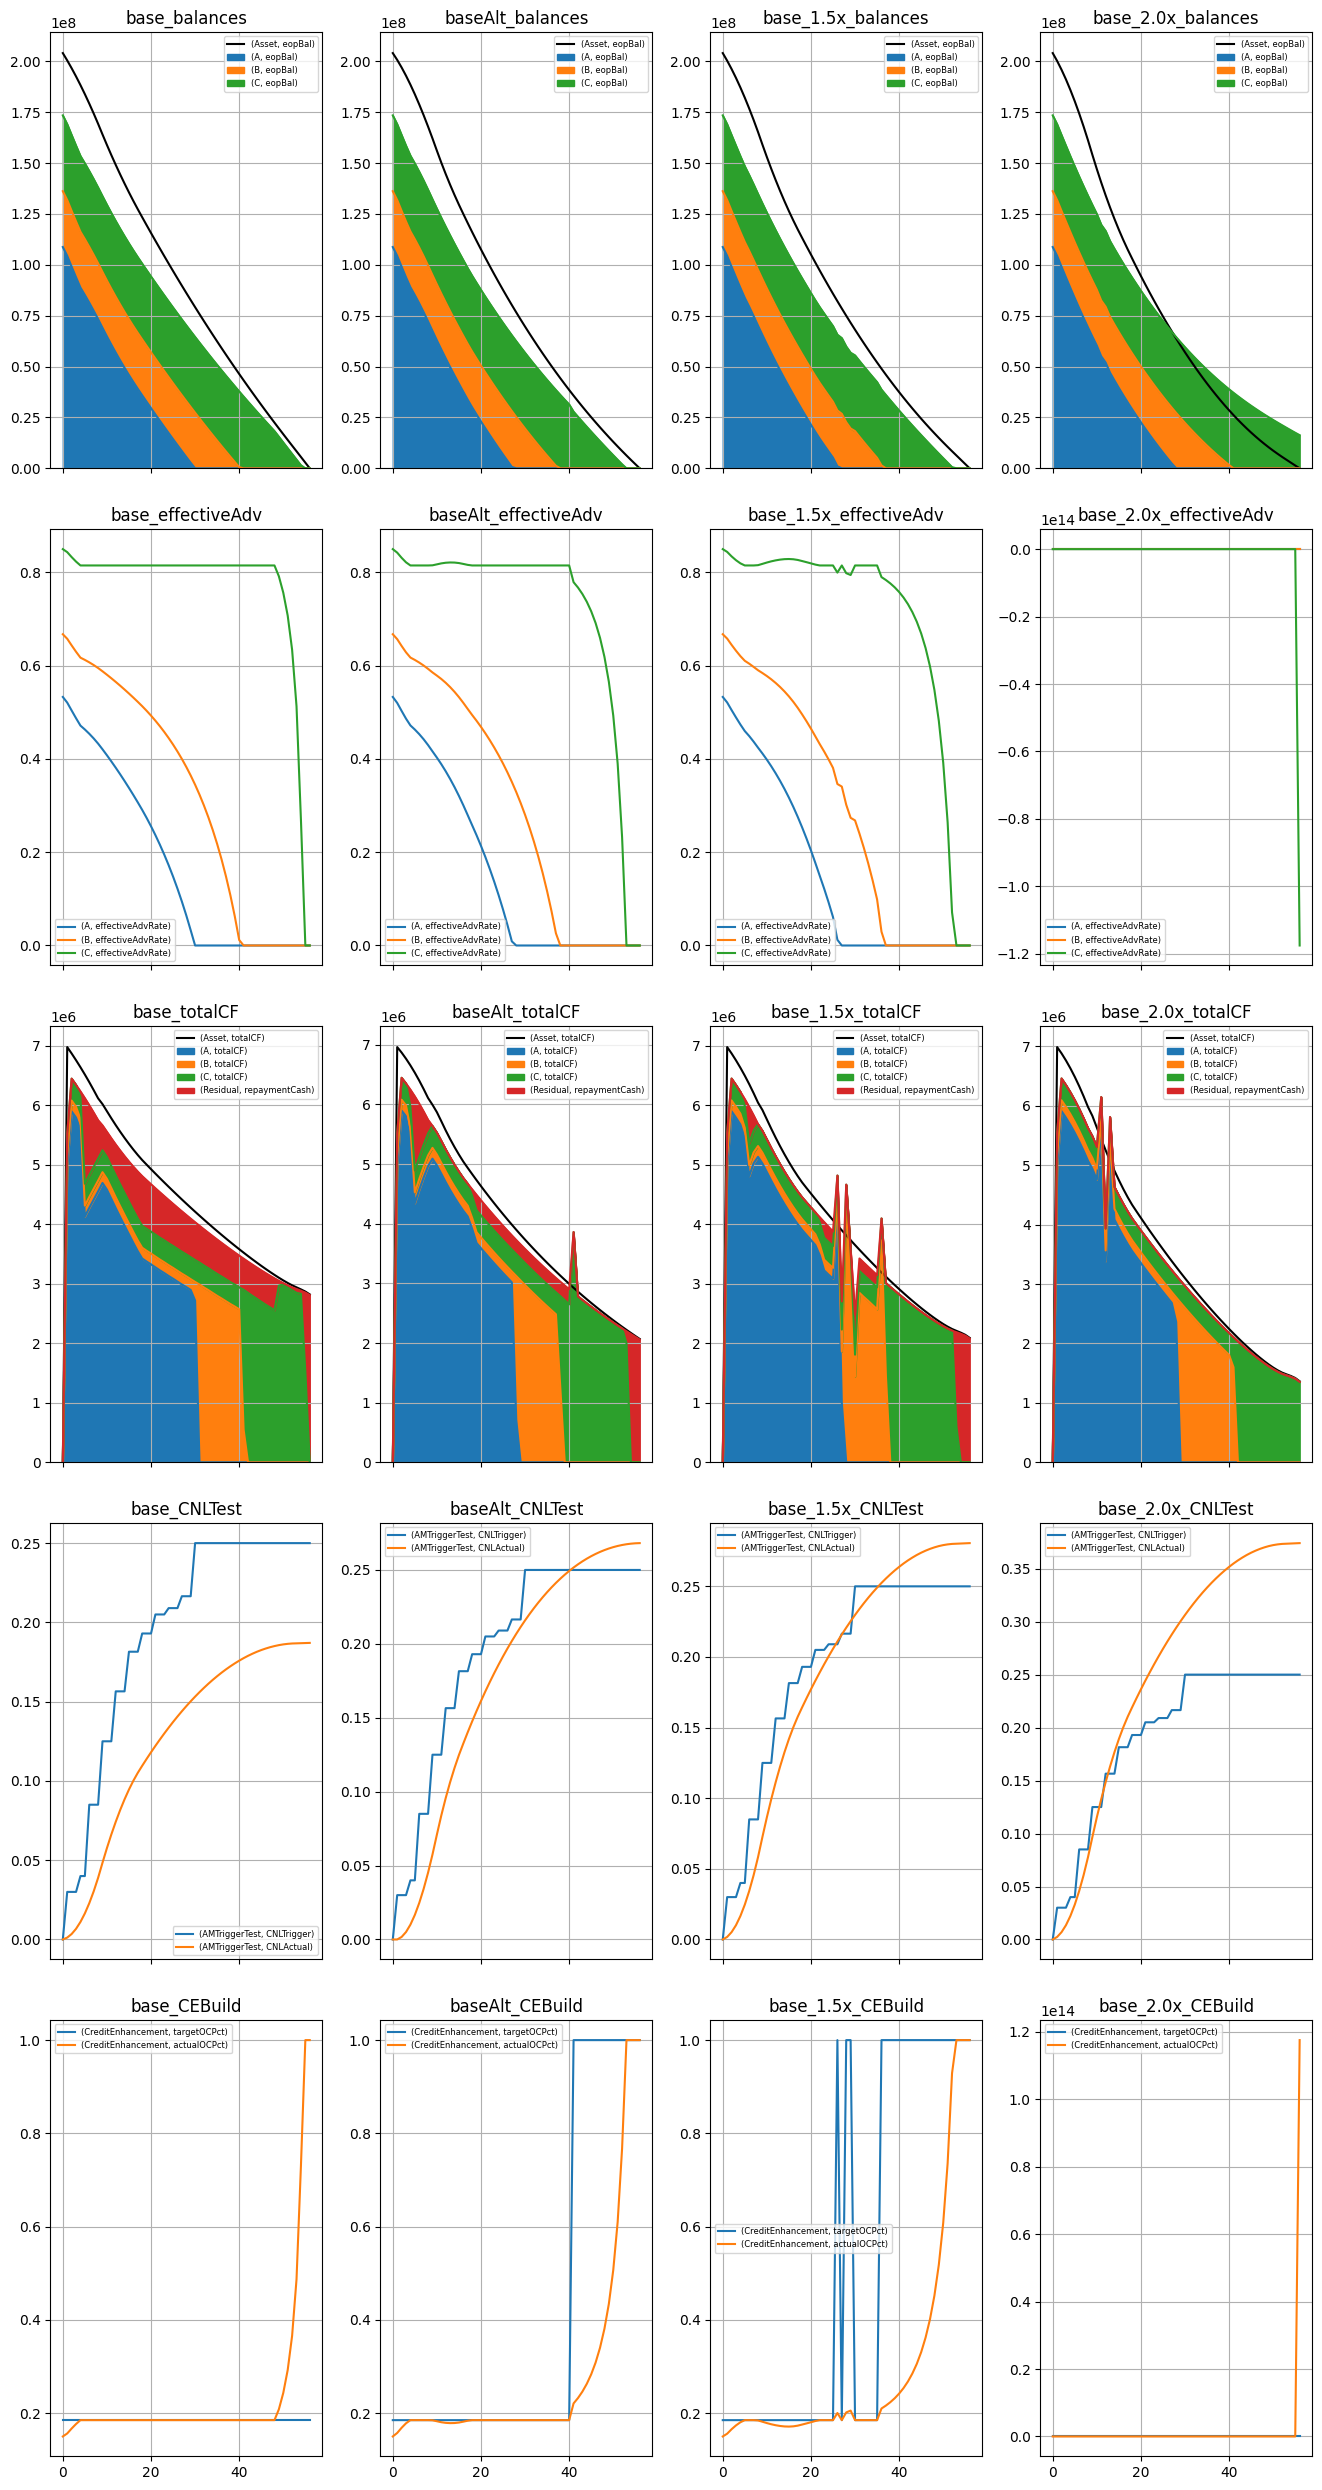

In [16]:
analytics.plotStructureCurves()

#### warehouse structuring, scenario analysis, comprehensive analytics visuals

In [18]:
dealConsumerLoanWH = DealManager(dealName = "UPST2302",
                                 dealDescriptive = {"dealSubsector":"consumer loan",

                                       "dealSector":"Consumer",
                                       "assetOriginator":"Upstart"                                       
                        },
                    rampSchedule = {"ramp": "100 100", "px":"100 100"},
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    financingTerms = StructureStore.STRUCTURESTORE['WH']
                    )
dealConsumerLoanWH.addSeriesDefaultScenario(startingMultiple=1.5, endingMultiple=2.0, step=0.5, baseScenario="base")

analytics = DealAnalytics(dealConsumerLoanWH)
analytics.presentDeal()



*********************************
******     Capital Stack
*********************************
  class  commitPeriod  facilitySize  coupon  undrawnFee paywindow  advRate  \
0   Snr             6   100000000.0    0.07       0.001    7 - 29       70   
1  Mezz             6    30000000.0    0.13       0.002    2 - 35       85   

   effectiveAdvRate  
0          0.326598  
1          0.485059  


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base          base_1.5x         base_2.0x
matrics/px                                                           
notional            1000000000.0       1000000000.0      1000000000.0
wal                     2.282954           2.149855          1.976973
intRate                   0.2175             0.2175            0.2175
term                          56                 56                56
intPm

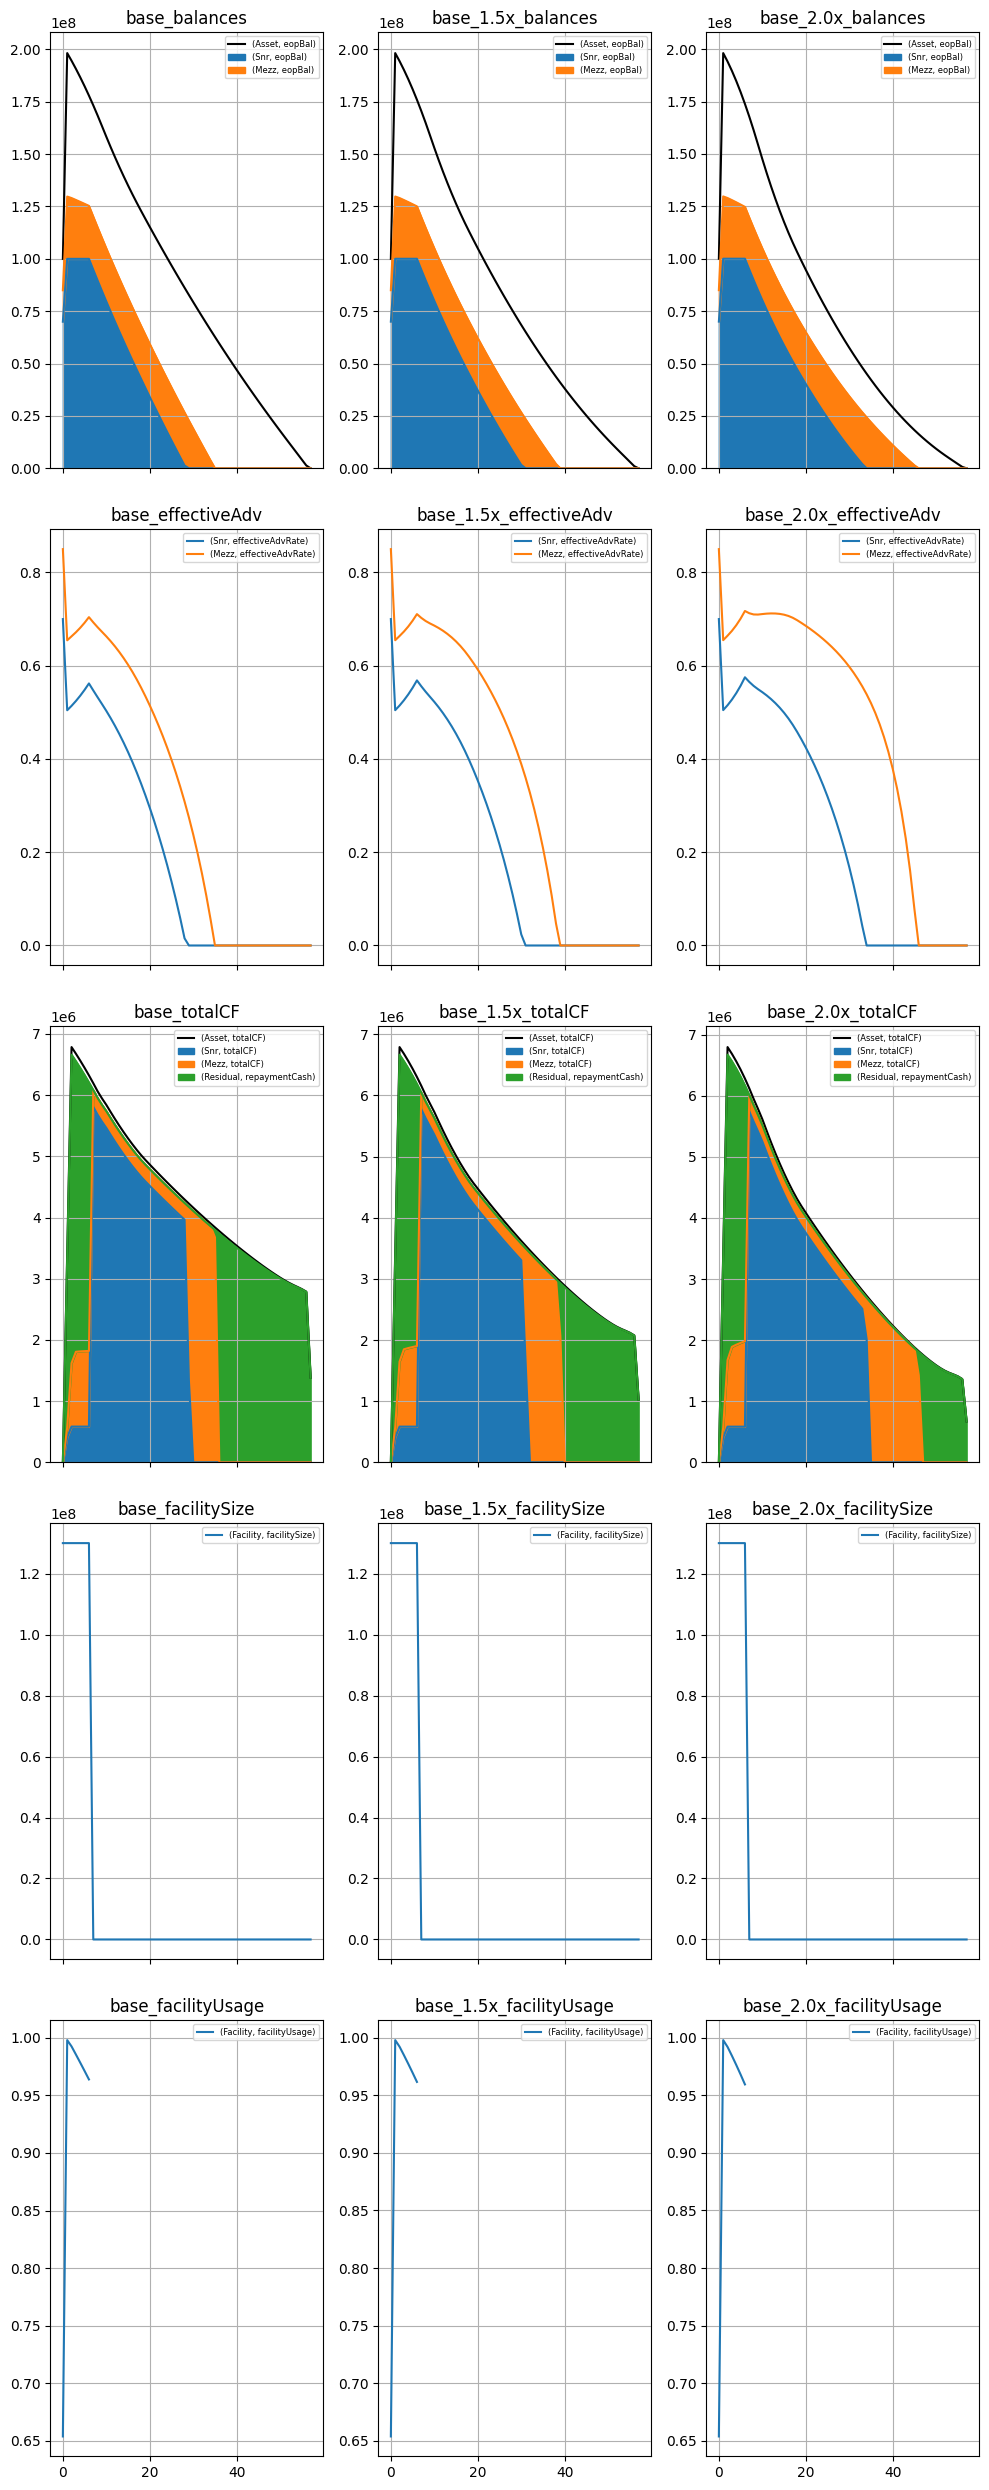

In [19]:
analytics.plotStructureCurves()